In [34]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'

In [36]:
anndata_objects = []
anndataA11_all = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all_0threshold.h5ad')
anndataA12_all = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all_0threshold.h5ad')
anndataC2_all = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all_0threshold.h5ad') 
anndataD21_all = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all_0threshold.h5ad')
#anndataPS_all = sc.read(OUTPUT_DIR + '/' + 'PS/ps_slice_all_0threshold.h5ad')
anndata_objects.append(anndataA11_all)
anndata_objects.append(anndataA12_all)
anndata_objects.append(anndataC2_all)
anndata_objects.append(anndataD21_all)
#anndata_objects.append(anndataPS_all)
samples = ["A1-1","A1-2","C2","D2-1"]
#samples = ["A1-1","A1-2","C2","D2-1","PS"]

In [37]:
genes = []
for anndata in anndata_objects:
    genes.extend(anndata.var_names.tolist())
# get unique genes
genes = list(set(genes))
# order the genes
genes.sort()
# print to csv
df = pd.DataFrame(genes)
df.to_csv('genes.csv',index=False,header=False)

In [38]:
total = 0
for annd in anndata_objects:
    print(len(annd.obs['leiden'].unique()))
    total += len(annd.obs['leiden'].unique())
print(total)   

125
121
161
125
532


In [39]:
names_anno_plot = ['Score_Genes_Binned [Martin1]','Score_Genes_Binned [Martin2]','Score_Genes_Binned [Atlas(_Score)_12]','Score_Genes_Binned [Atlas(_Score)_7]', 'Tangram [snRNA-seq]','Score_Genes_Iterative [Martin1]','Score_Genes_Iterative [Martin2]','Score_Genes_Iterative [Atlas_12]','Score_Genes_Iterative [Atlas_Score_12]','Score_Genes_Iterative [Atlas_7]','Score_Genes_Iterative [Atlas_Score_7]']
annotations = ['annotation_score_genes_original_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_score_genes_original_Atlas_7','annotation_tangram_11','annotation_own_score_genes_BasicMartin_12','annotation_own_score_genes_HLMartin_12','annotation_own_score_genes_Atlas_12','annotation_own_score_genes_Atlas_Scores_12','annotation_own_score_genes_Atlas_7','annotation_own_score_genes_Atlas_Scores_7']
# reverse order
annotations = annotations[::-1]
names_anno_plot = names_anno_plot[::-1]

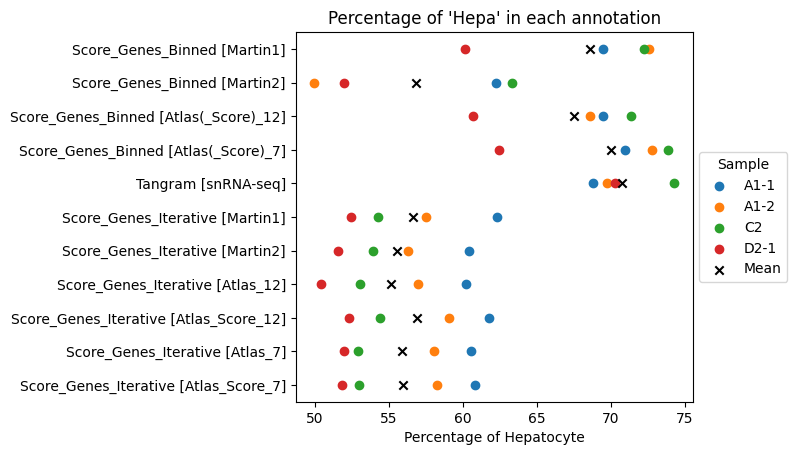

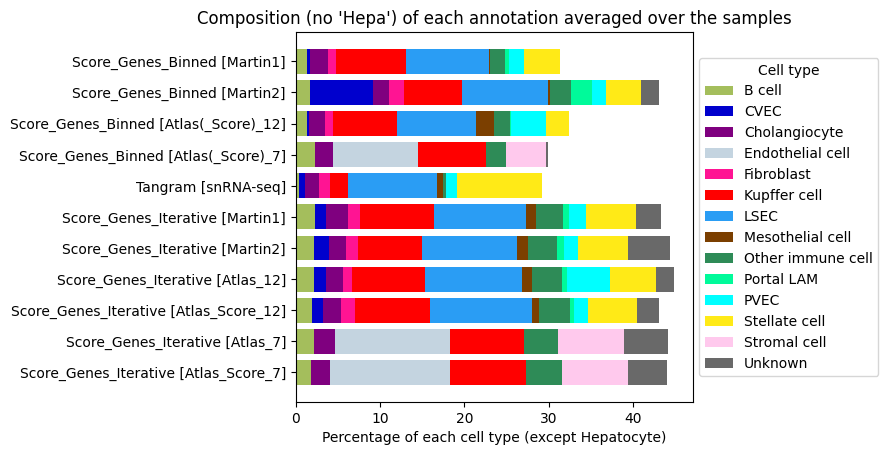

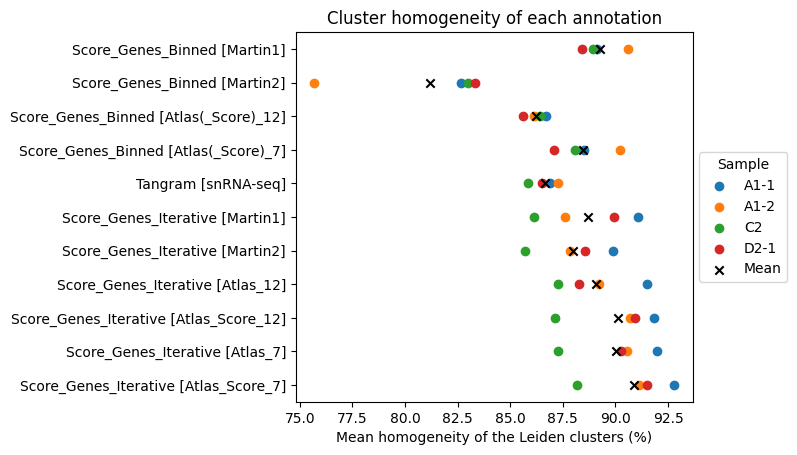

In [40]:
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations,names_anno_plot,chosen_ct='Hepa',mean=True,save=True,saved_as='thesis_perc_Hepa',suffix='',xlabel_suffix='of Hepatocyte')
output = compare_annotations_samples_mean_composition(anndata_objects,annotations,names_anno_plot,drop_cell_types=['Hepa'],plot=True,save=True,saved_as='thesis_perc_noHepa',suffix='',xlabel_suffix='of each cell type (except Hepatocyte)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations,names_anno_plot,drop_cell_types=[],mean=True,save=True,saved_as='thesis_homogeneity',suffix='')

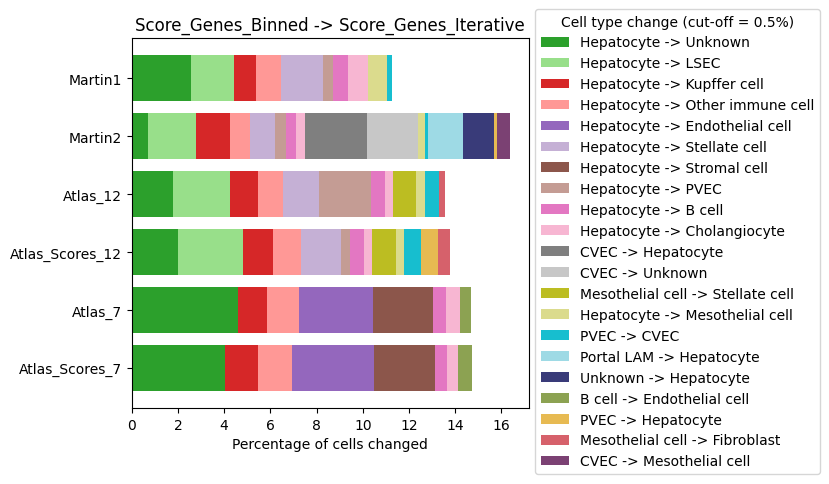

In [41]:
annotations1 = ['annotation_score_genes_original_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_score_genes_original_Atlas_Scores_12','annotation_score_genes_original_Atlas_7','annotation_score_genes_original_Atlas_Scores_7']
annotations2 = ['annotation_own_score_genes_BasicMartin_12','annotation_own_score_genes_HLMartin_12','annotation_own_score_genes_Atlas_12','annotation_own_score_genes_Atlas_Scores_12','annotation_own_score_genes_Atlas_7','annotation_own_score_genes_Atlas_Scores_7']
Markers = ['Martin1','Martin2','Atlas_12','Atlas_Scores_12','Atlas_7','Atlas_Scores_7']
annotations1 = annotations1[::-1]
annotations2 = annotations2[::-1]
Markers = Markers[::-1]
differences_composition_annotation_methods(anndata_objects,annotations1,annotations2,"Score_Genes_Binned","Score_Genes_Iterative",Markers,cut_off=0.5)

In [ ]:
annotations = annotations[::-1]
annotation_ct_cluster_dict = {}
for anno in annotations:
    annotation_ct_cluster_dict[anno] = {}
    for annd in anndata_objects:        
        clusters_dict = clusteringVSleiden(annd,anno,'leiden', cell_types = 'all')
        anno_keys = list(annotation_ct_cluster_dict[anno].keys())        
        print(anno_keys)
        for ct in clusters_dict.keys():
            if ct not in anno_keys:
                annotation_ct_cluster_dict[anno][ct] = clusters_dict[ct]
            else:
                annotation_ct_cluster_dict[anno][ct] = annotation_ct_cluster_dict[anno][ct] + clusters_dict[ct]


In [9]:
annotations

['annotation_score_genes_original_BasicMartin_12',
 'annotation_score_genes_original_HLMartin_12',
 'annotation_score_genes_original_Atlas_12',
 'annotation_score_genes_original_Atlas_7',
 'annotation_tangram_11',
 'annotation_own_score_genes_BasicMartin_12',
 'annotation_own_score_genes_HLMartin_12',
 'annotation_own_score_genes_Atlas_12',
 'annotation_own_score_genes_Atlas_Scores_12',
 'annotation_own_score_genes_Atlas_7',
 'annotation_own_score_genes_Atlas_Scores_7']

In [10]:
total_clusters = 532
annotation = annotations[10]
print(annotation)
total = 0
for ct in annotation_ct_cluster_dict[annotation].keys():
    print(ct)
    number = len(annotation_ct_cluster_dict[annotation][ct])
    print(str(round(number/4,2))+'\\\\')
    total += number
    mean = 0
    for i in range(number):
        mean += annotation_ct_cluster_dict[annotation][ct][i][1]
    mean = int(round(mean/number,2)*100)
    print(mean)
    print('')
print(total)

annotation_own_score_genes_Atlas_Scores_7
Endo
18.75\\
90

Oth im
6.0\\
79

Hepa
78.0\\
94

Kupf
10.75\\
89

Strom
9.75\\
88

Chol
2.0\\
98

B cell
1.75\\
99

Unknown
3.75\\
78

no>50
2.25\\
43

532


In [11]:
total_clusters = 0
total_cells = 0
for annd in anndata_objects:
    print(len(annd.obs['leiden']))
    print(len(annd.obs['leiden'].unique()))
    total_cells += len(annd.obs['leiden'])
    total_clusters += len(annd.obs['leiden'].unique())

11283
125
8695
121
27133
161
12519
125


In [12]:
print('Mean cells per sample:')
print(round(total_cells/4))
print('Mean clusters per sample:')
print(round(total_clusters/4))
print('Mean cells per cluster:')
print(round(total_cells/total_clusters))

Mean cells per sample:
14908
Mean clusters per sample:
133
Mean cells per cluster:
112


In [13]:
anndata_objects[0].obs[annotations[3]].unique()

['Hepa', 'Strom', 'Kupf', 'Endo', 'B cell', 'Chol', 'Unknown', 'Oth im']
Categories (8, object): ['B cell', 'Chol', 'Endo', 'Hepa', 'Kupf', 'Oth im', 'Strom', 'Unknown']

In [22]:
names_anno_plot = ['Score_Genes_Binned [Martin1]','Score_Genes_Binned [Martin2]','Score_Genes_Binned [Atlas(_Score)_12]','Score_Genes_Binned [Atlas(_Score)_7]', 'Tangram [snRNA-seq]','Score_Genes_Iterative [Martin1]','Score_Genes_Iterative [Martin2]','Score_Genes_Iterative [Atlas_12]','Score_Genes_Iterative [Atlas_Score_12]','Score_Genes_Iterative [Atlas_7]','Score_Genes_Iterative [Atlas_Score_7]']
annotations = ['annotation_score_genes_original_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_score_genes_original_Atlas_7','annotation_tangram_11','annotation_own_score_genes_BasicMartin_12','annotation_own_score_genes_HLMartin_12','annotation_own_score_genes_Atlas_12','annotation_own_score_genes_Atlas_Scores_12','annotation_own_score_genes_Atlas_7','annotation_own_score_genes_Atlas_Scores_7']

adaptations = {}
adaptations[(annotations[0],annotations[3])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[1],annotations[3])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[2],annotations[3])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[0],annotations[4])] = [('Portal LAM','Oth im')]
adaptations[(annotations[1],annotations[4])] = [('Portal LAM','Oth im')]
adaptations[(annotations[2],annotations[4])] = [('Portal LAM','Oth im')]
adaptations[(annotations[0],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[1],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[2],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[0],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[1],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[2],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[3],annotations[4])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom')]
adaptations[(annotations[3],annotations[5])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[3],annotations[6])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[3],annotations[7])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[3],annotations[8])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[4],annotations[5])] = [('Portal LAM','Oth im')]
adaptations[(annotations[4],annotations[6])] = [('Portal LAM','Oth im')]
adaptations[(annotations[4],annotations[7])] = [('Portal LAM','Oth im')]
adaptations[(annotations[4],annotations[8])] = [('Portal LAM','Oth im')]
adaptations[(annotations[4],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom')]
adaptations[(annotations[4],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom')]
adaptations[(annotations[5],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[6],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[7],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[8],annotations[9])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[5],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[6],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[7],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]
adaptations[(annotations[8],annotations[10])] = [('LSEC','Endo'),('PVEC','Endo'),('CVEC','Endo'),('Stel','Strom'),('Fibr','Strom'),('Meso','Strom'),('Portal LAM','Oth im')]

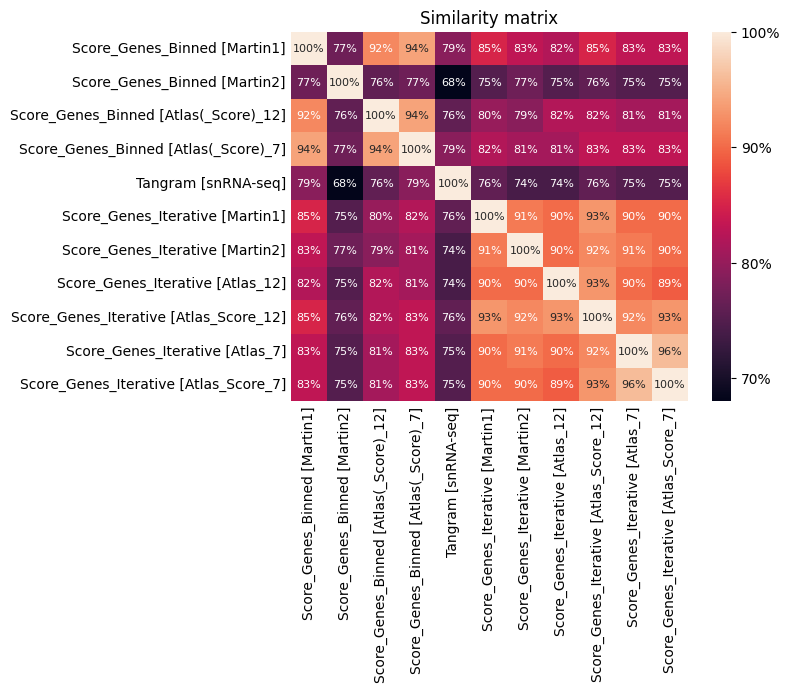

In [25]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations,names_anno_plot,adaptations,save=True,saved_as='thesis_similarity_matrix',suffix='')

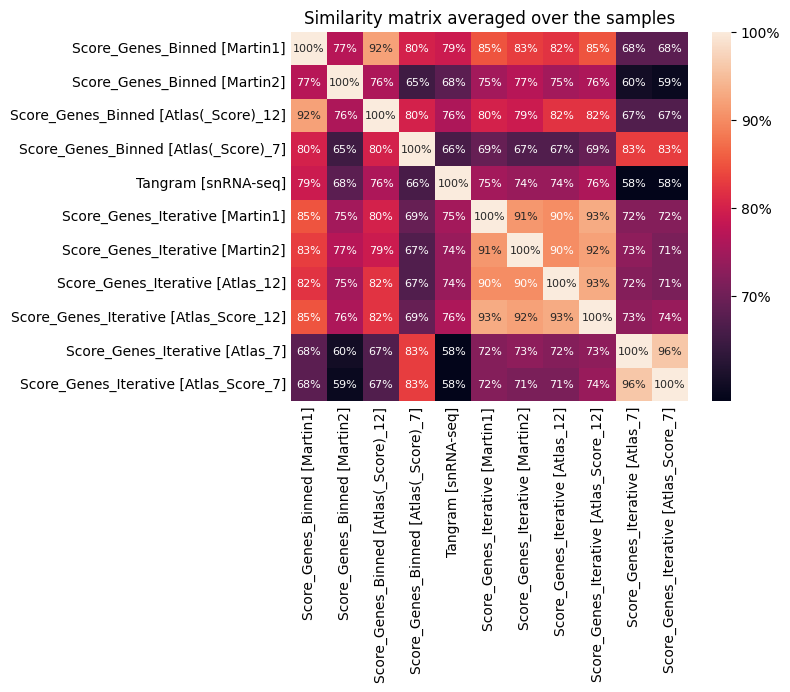

In [20]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations,names_anno_plot,save=False,saved_as='',suffix='')

In [ ]:
names_anno_plot = ['Binned (Martin)', 'Binned (HL Martin)', 'Binned (Atlas)', 'Binned (Atlas Scores)', 'Subt_Mean (Martin)', 'Subt_Mean (HL Martin)', 'Subt_Mean (Atlas)', 'Subt_Mean (Atlas Scores)', 'Subt_Mean_It (Martin)', 'Subt_Mean_It (HL Martin)', 'Subt_Mean_It (Atlas)', 'Subt_Mean_It (Atlas Scores)', 'Tangram']


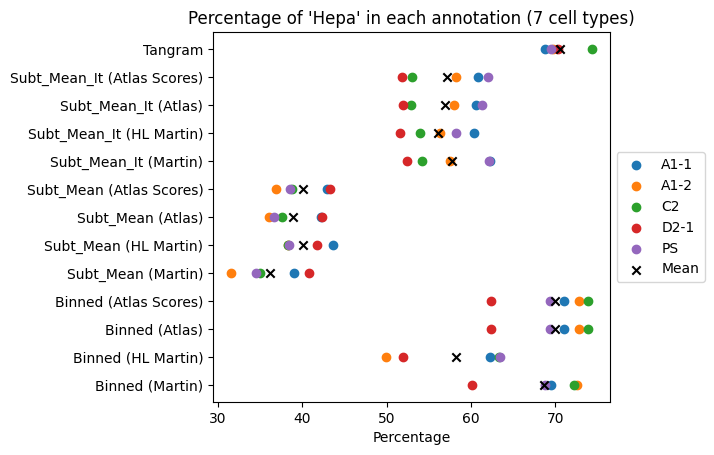

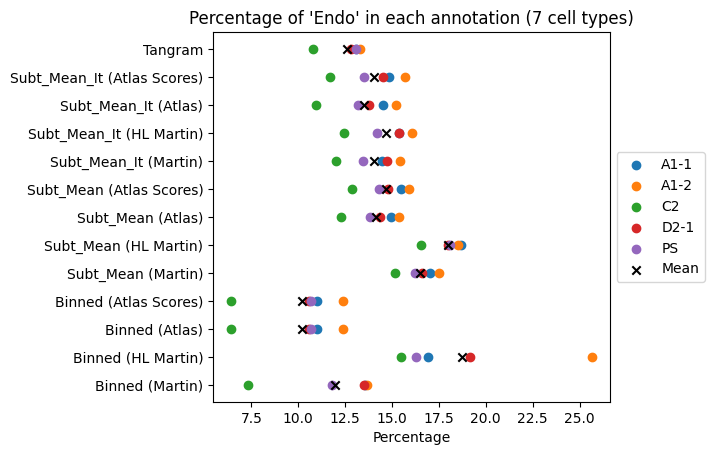

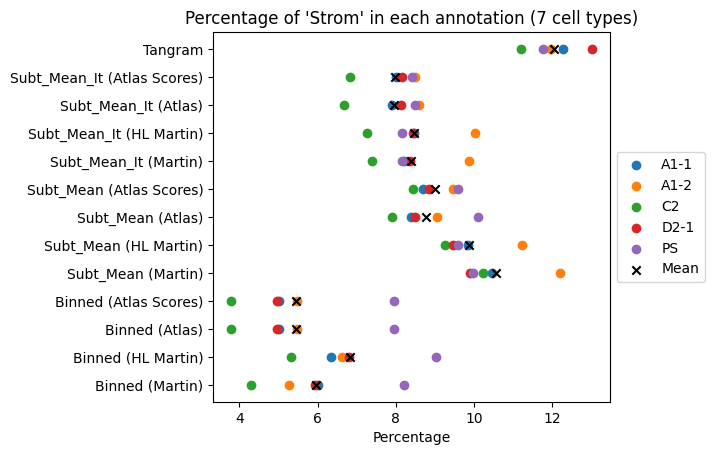

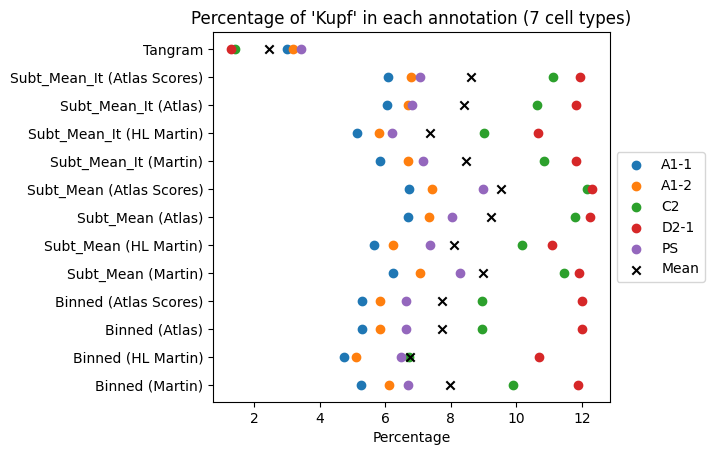

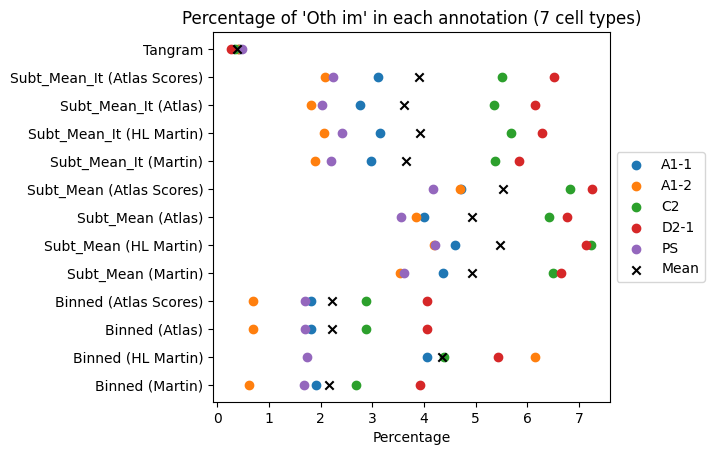

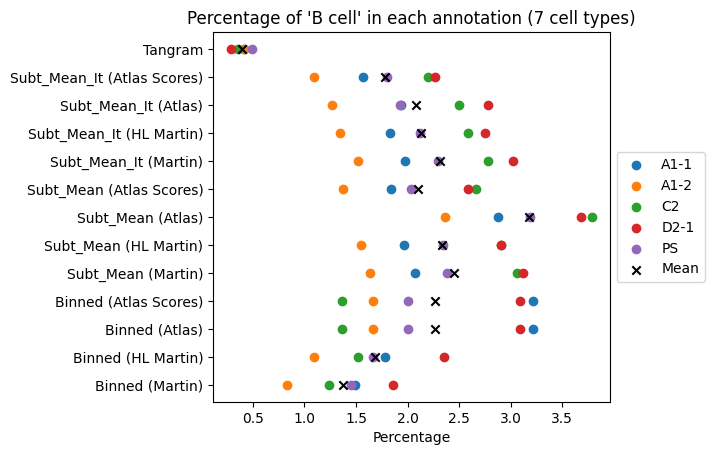

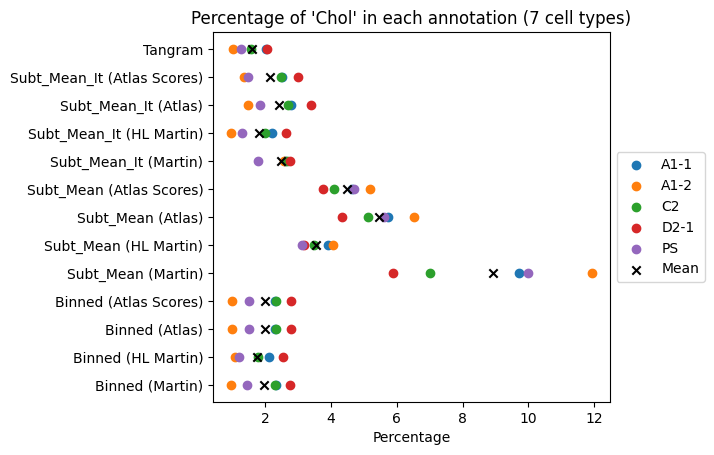

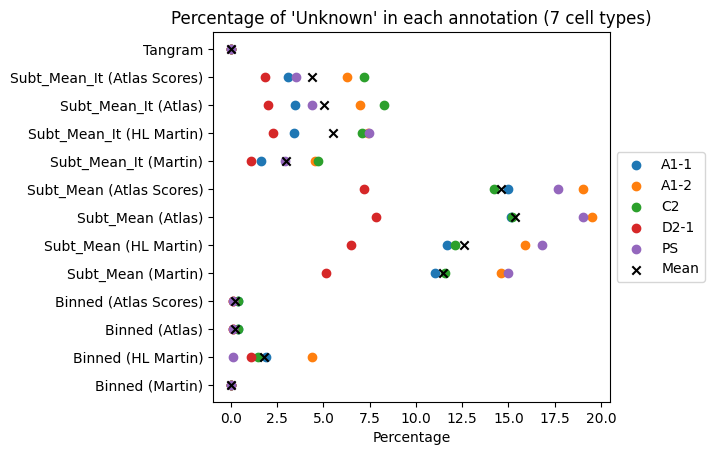

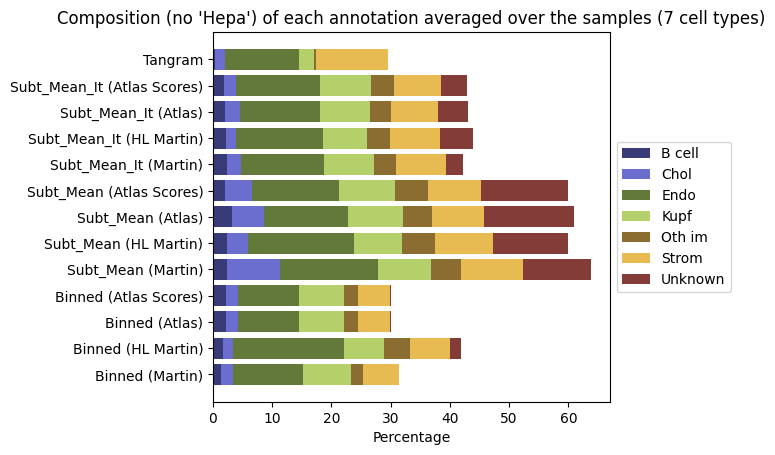

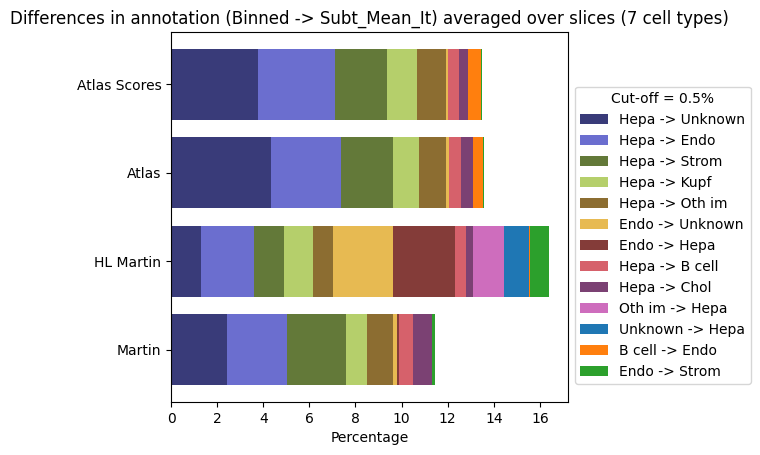

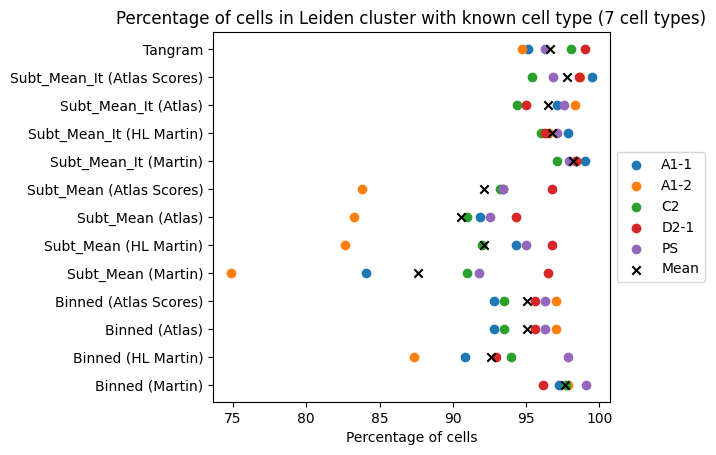

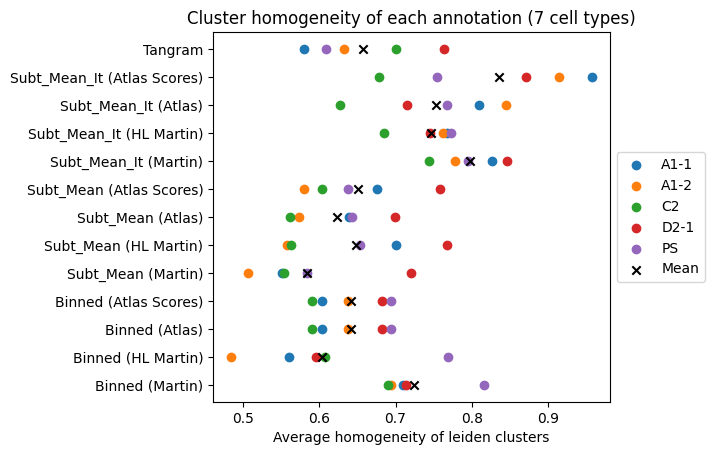

In [5]:
annotations_7 = ['annotation_score_genes_original_BasicMartin_7','annotation_score_genes_original_HLMartin_7','annotation_score_genes_original_Atlas_7','annotation_score_genes_original_Atlas_Scores_7','annotation_own_score_genes_start_iterative_BasicMartin_7','annotation_own_score_genes_start_iterative_HLMartin_7','annotation_own_score_genes_start_iterative_Atlas_7','annotation_own_score_genes_start_iterative_Atlas_Scores_7','annotation_own_score_genes_BasicMartin_7','annotation_own_score_genes_HLMartin_7','annotation_own_score_genes_Atlas_7','annotation_own_score_genes_Atlas_Scores_7','annotation_tangram_7']
annotations1_7 = ['annotation_score_genes_original_BasicMartin_7','annotation_score_genes_original_HLMartin_7','annotation_score_genes_original_Atlas_7','annotation_score_genes_original_Atlas_Scores_7']
annotations2_7 = ['annotation_own_score_genes_BasicMartin_7','annotation_own_score_genes_HLMartin_7','annotation_own_score_genes_Atlas_7','annotation_own_score_genes_Atlas_Scores_7']
Markers = ['Martin','HL Martin','Atlas','Atlas Scores']
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Hepa',mean=True,save=True,saved_as='all_samples_perc_Hepa_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Endo',mean=True,save=True,saved_as='all_samples_perc_Endo_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Strom',mean=True,save=True,saved_as='all_samples_perc_Strom_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Kupf',mean=True,save=True,saved_as='all_samples_perc_Kupf_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Oth im',mean=True,save=True,saved_as='all_samples_perc_Oth_im_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='B cell',mean=True,save=True,saved_as='all_samples_perc_B_cell_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Chol',mean=True,save=True,saved_as='all_samples_perc_Chol_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Unknown',mean=True,save=True,saved_as='all_samples_perc_Unknown_7',suffix=' (7 cell types)')
output = compare_annotations_samples_mean_composition(anndata_objects,annotations_7,names_anno_plot,drop_cell_types=['Hepa'],plot=True,save=True,saved_as='all_samples_perc_cell_types_mean_7',suffix=' (7 cell types)')
differences_composition_annotation_methods(anndata_objects,annotations1_7,annotations2_7,"Binned","Subt_Mean_It",Markers,cut_off=0.5,save=True,saved_as='all_samples_diff_Binned_SubtMeanIt_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_7,names_anno_plot,mean=True,save=True,saved_as='all_samples_perc_in_known_cluster_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_7,names_anno_plot,drop_cell_types=[],mean=True,save=True,saved_as='all_samples_homogeneity_7',suffix=' (7 cell types)')

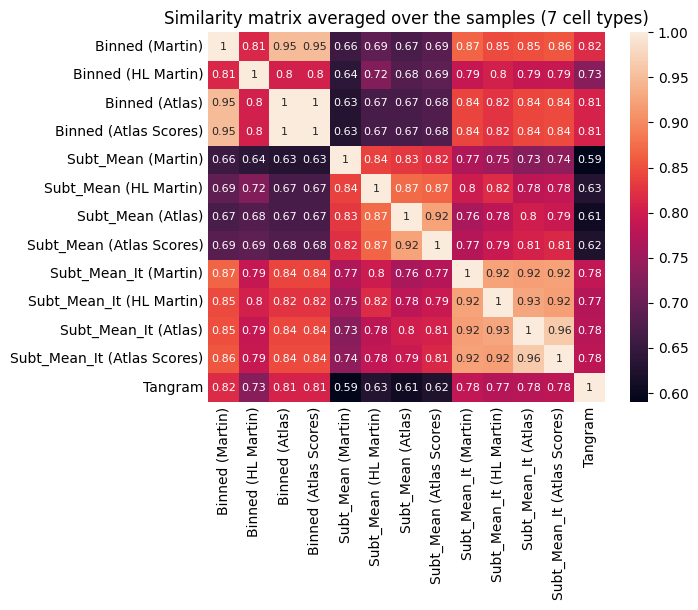

In [6]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations_7,names_anno_plot,save=True,saved_as='all_samples_similarity_matrix_7',suffix=' (7 cell types)')

([[(82, 0.92, 76, 'B cell', 0), (87, 0.74, 72, 'B cell', 0)], [(92, 0.52, 66, 'Central vein', 0)], [(25, 0.91, 123, 'Chol', 0), (30, 0.98, 118, 'Chol', 0)], [(31, 0.64, 118, 'Fibr', 0)], [(2, 1.0, 164, 'Hepa', 0), (5, 1.0, 148, 'Hepa', 0), (7, 0.99, 141, 'Hepa', 0), (9, 1.0, 139, 'Hepa', 0), (11, 1.0, 133, 'Hepa', 0), (12, 1.0, 133, 'Hepa', 0), (14, 1.0, 132, 'Hepa', 0), (16, 1.0, 131, 'Hepa', 0), (17, 1.0, 130, 'Hepa', 0), (18, 1.0, 130, 'Hepa', 0), (20, 1.0, 127, 'Hepa', 0), (21, 1.0, 125, 'Hepa', 0), (23, 1.0, 124, 'Hepa', 0), (24, 1.0, 123, 'Hepa', 0), (26, 0.99, 122, 'Hepa', 0), (28, 1.0, 120, 'Hepa', 0), (29, 1.0, 119, 'Hepa', 0), (32, 1.0, 118, 'Hepa', 0), (34, 1.0, 117, 'Hepa', 0), (35, 1.0, 115, 'Hepa', 0), (38, 1.0, 113, 'Hepa', 0), (39, 1.0, 110, 'Hepa', 0), (40, 1.0, 110, 'Hepa', 0), (41, 1.0, 108, 'Hepa', 0), (43, 1.0, 106, 'Hepa', 0), (44, 1.0, 106, 'Hepa', 0), (46, 1.0, 106, 'Hepa', 0), (47, 1.0, 103, 'Hepa', 0), (48, 1.0, 102, 'Hepa', 0), (49, 0.99, 102, 'Hepa', 0), (50

IndexError: list index out of range

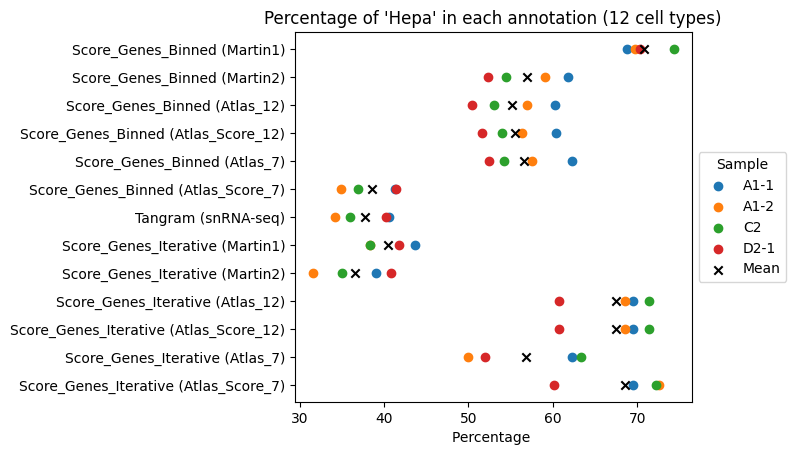

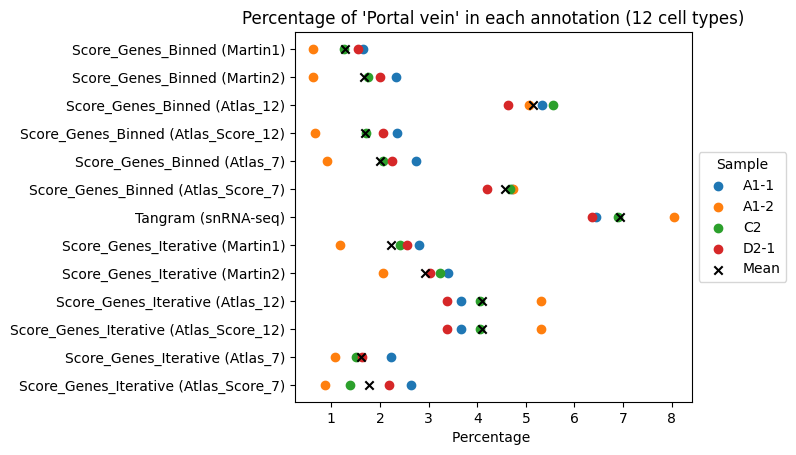

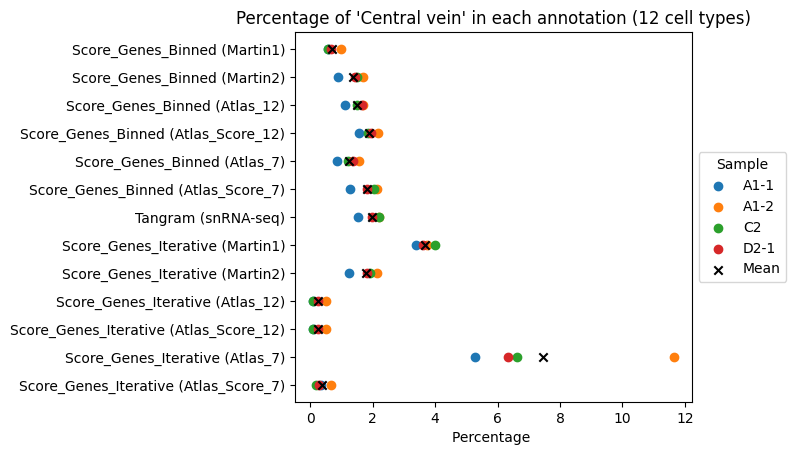

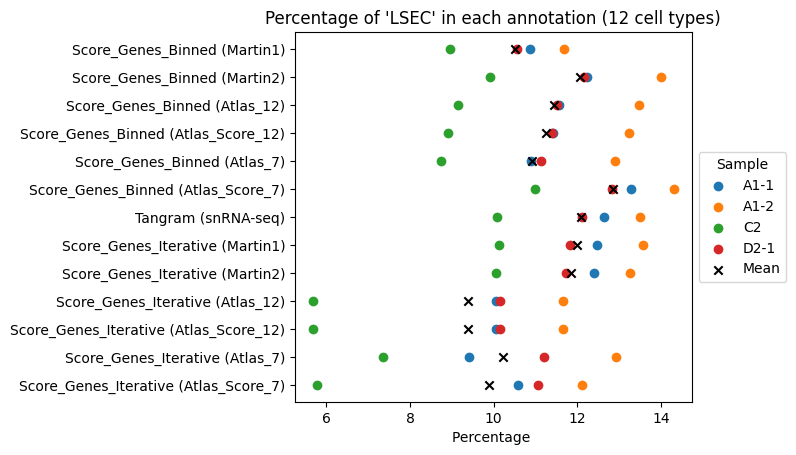

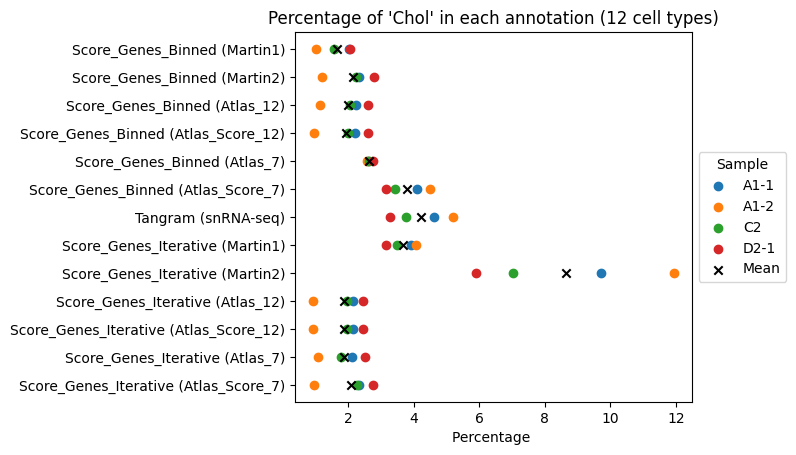

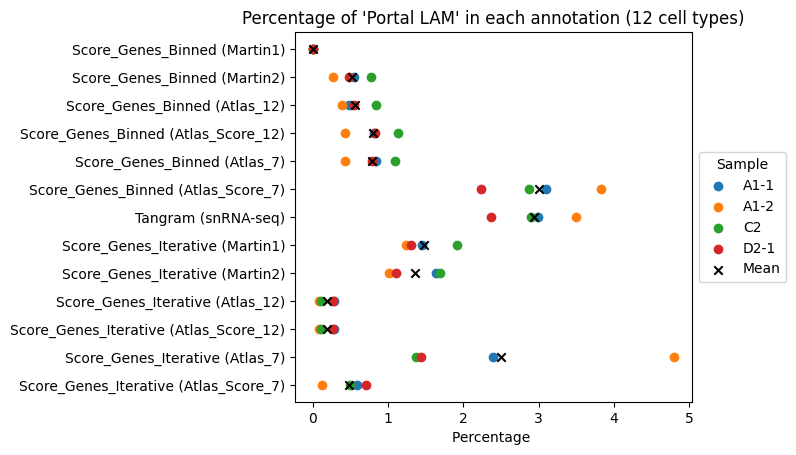

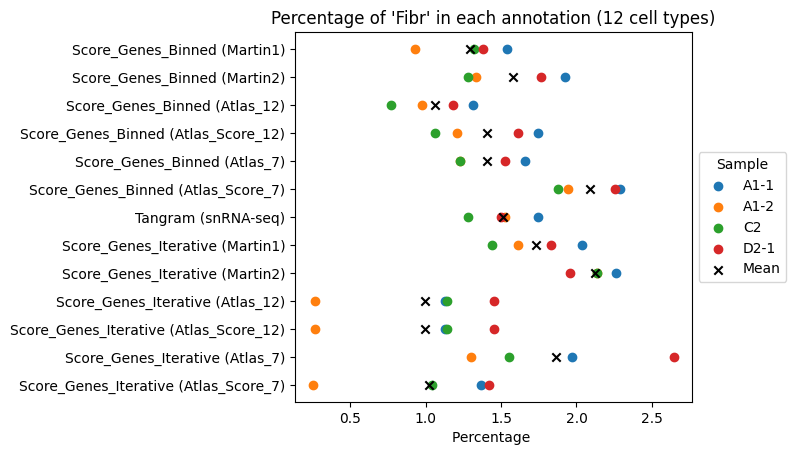

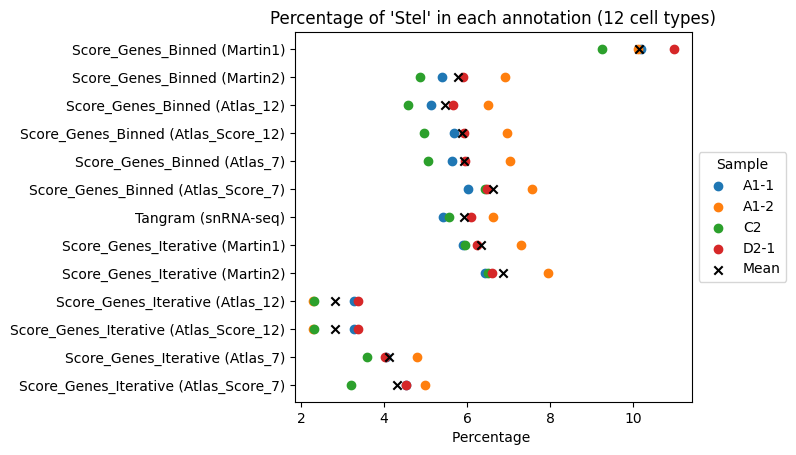

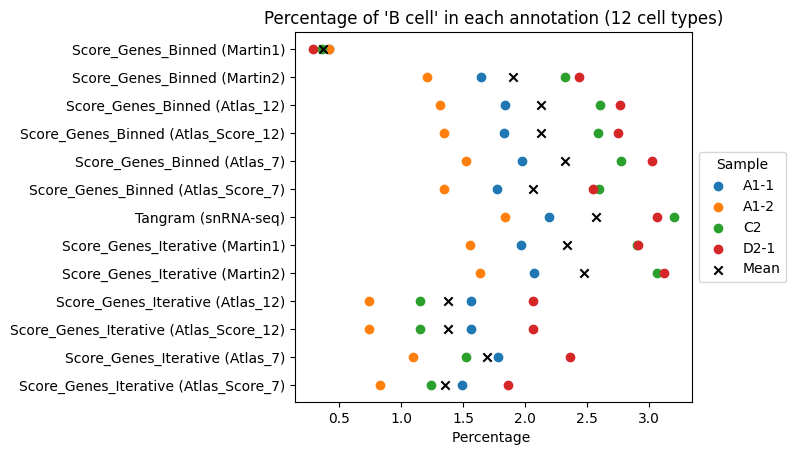

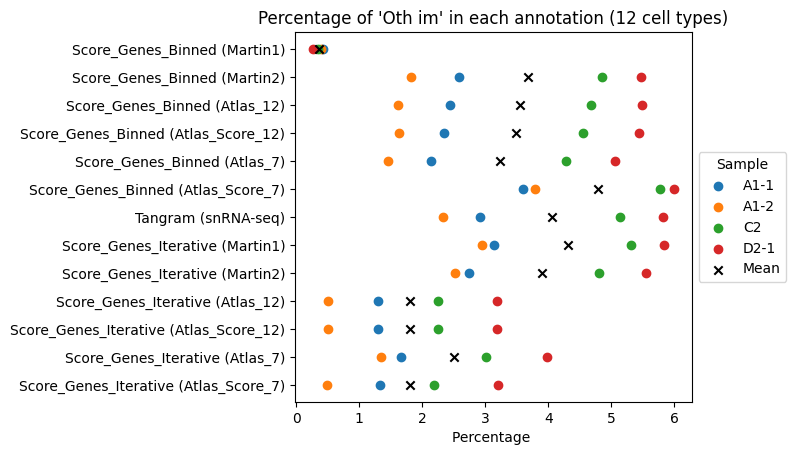

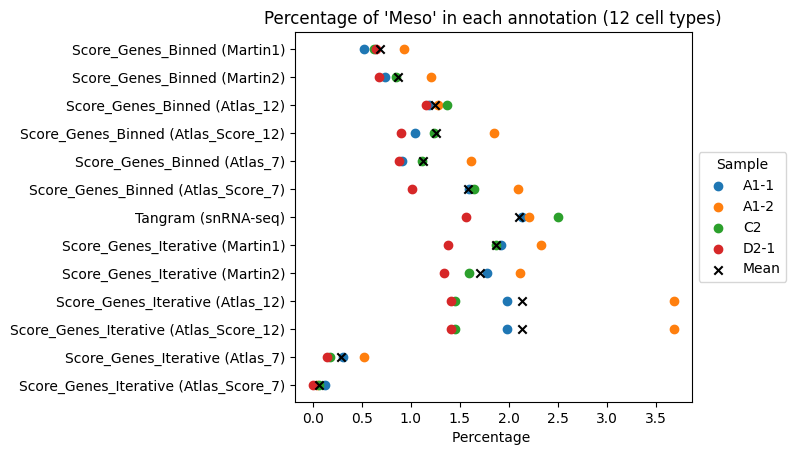

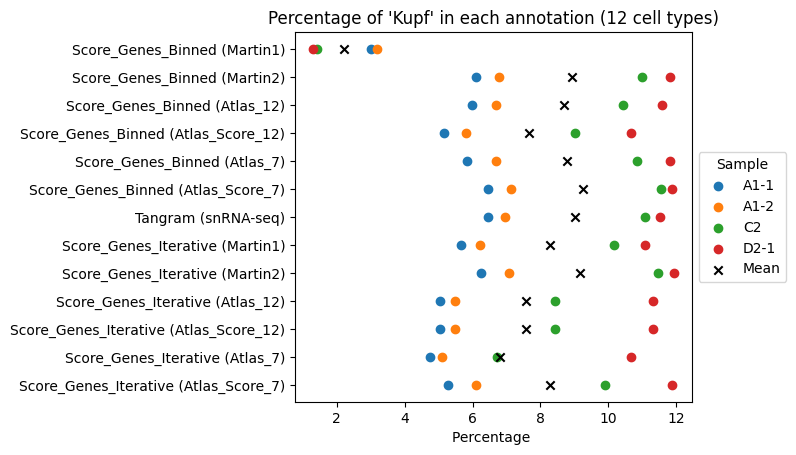

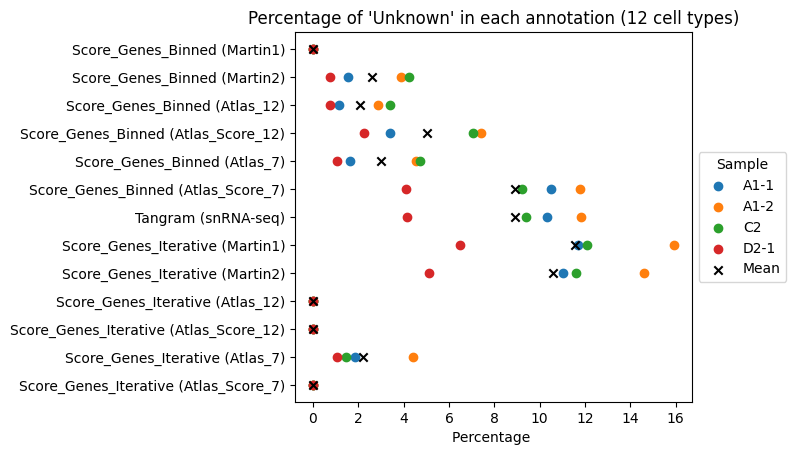

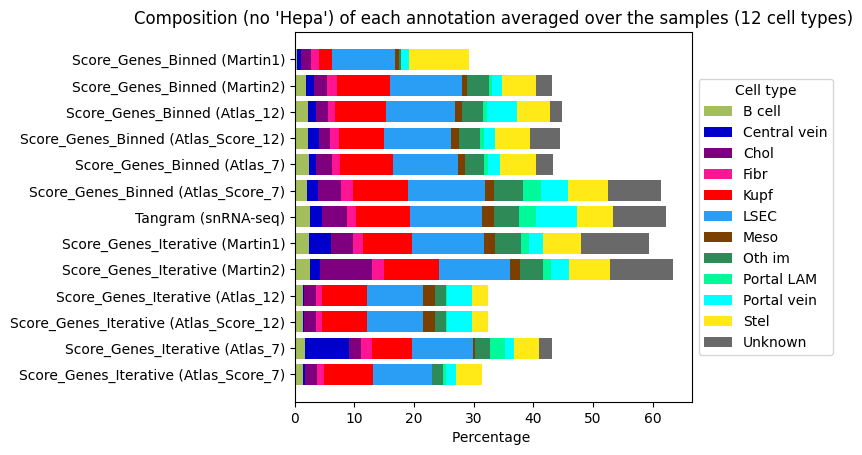

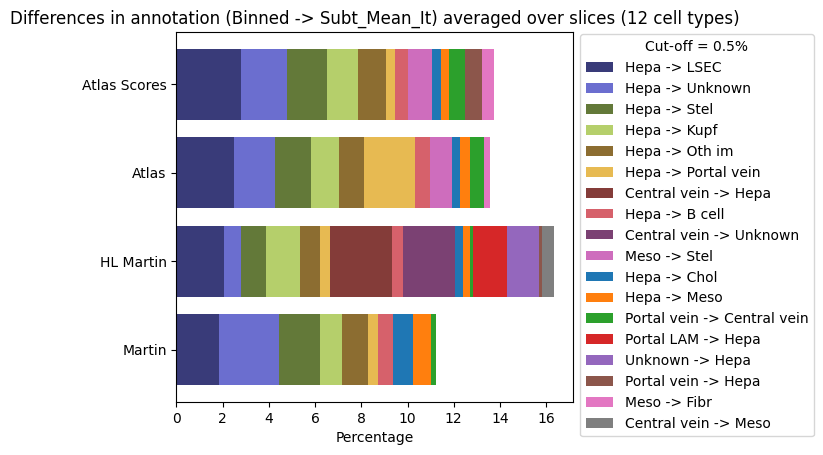

In [15]:
annotations_12 = ['annotation_score_genes_original_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_score_genes_original_Atlas_Scores_12','annotation_own_score_genes_start_iterative_BasicMartin_12','annotation_own_score_genes_start_iterative_HLMartin_12','annotation_own_score_genes_start_iterative_Atlas_12','annotation_own_score_genes_start_iterative_Atlas_Scores_12','annotation_own_score_genes_BasicMartin_12','annotation_own_score_genes_HLMartin_12','annotation_own_score_genes_Atlas_12','annotation_own_score_genes_Atlas_Scores_12','annotation_tangram_11']
annotations1_12 = ['annotation_score_genes_original_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_score_genes_original_Atlas_Scores_12']
annotations2_12 = ['annotation_own_score_genes_BasicMartin_12','annotation_own_score_genes_HLMartin_12','annotation_own_score_genes_Atlas_12','annotation_own_score_genes_Atlas_Scores_12']
Markers = ['Martin','HL Martin','Atlas','Atlas Scores']
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Hepa',mean=True,save=True,saved_as='all_samples_perc_Hepa_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Portal vein',mean=True,save=True,saved_as='all_samples_perc_Portal_vein_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Central vein',mean=True,save=True,saved_as='all_samples_perc_Central_vein_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='LSEC',mean=True,save=True,saved_as='all_samples_perc_LSEC_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Chol',mean=True,save=True,saved_as='all_samples_perc_Chol_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Portal LAM',mean=True,save=True,saved_as='all_samples_perc_Portal_LAM_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Fibr',mean=True,save=True,saved_as='all_samples_perc_Fibr_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Stel',mean=True,save=True,saved_as='all_samples_perc_Stel_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='B cell',mean=True,save=True,saved_as='all_samples_perc_B_cell_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Oth im',mean=True,save=True,saved_as='all_samples_perc_Oth_im_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Meso',mean=True,save=True,saved_as='all_samples_perc_Meso_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Kupf',mean=True,save=True,saved_as='all_samples_perc_Kupf_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Unknown',mean=True,save=True,saved_as='all_samples_perc_Unknown_12',suffix=' (12 cell types)')
output = compare_annotations_samples_mean_composition(anndata_objects,annotations_12,names_anno_plot,drop_cell_types=['Hepa'],plot=True,save=True,saved_as='all_samples_perc_cell_types_mean_12',suffix=' (12 cell types)')
differences_composition_annotation_methods(anndata_objects,annotations1_12,annotations2_12,"Binned","Subt_Mean_It",Markers,cut_off=0.5,save=True,saved_as='all_samples_diff_Binned_SubtMeanIt_12',suffix=' (12 cell types)')
#output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_12,names_anno_plot,mean=True,save=True,saved_as='all_samples_perc_in_known_cluster_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_12,names_anno_plot,drop_cell_types=[],mean=True,save=True,saved_as='all_samples_homogeneity_12',suffix=' (12 cell types)')


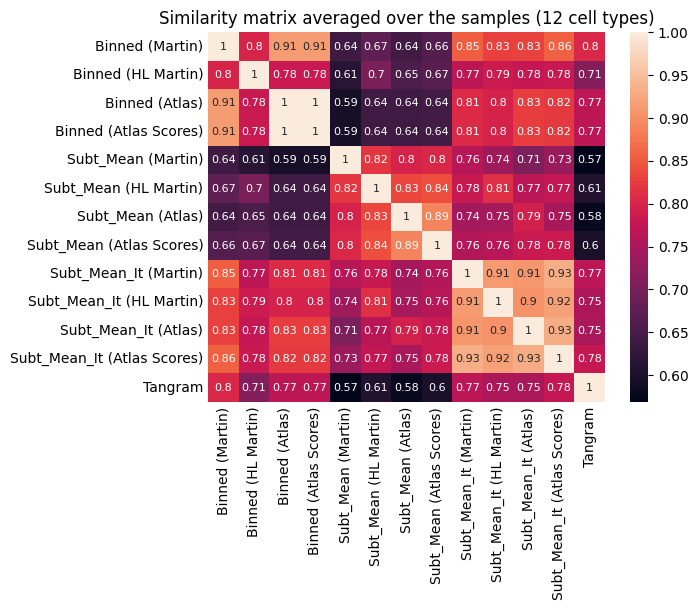

In [8]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations_12,names_anno_plot,save=True,saved_as='all_samples_similarity_matrix_12',suffix=' (12 cell types)')